In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds

import mne
from mne.channels import read_layout

In [2]:
list(range(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [2]:
# use synthetic board for demo
params = BrainFlowInputParams()
params.timeout = 10
params.serial_port = '/dev/ttyUSB0'
eeg_ch = BoardShim.get_eeg_channels(BoardIds.CYTON_DAISY_BOARD.value)
board = BoardShim(BoardIds.CYTON_DAISY_BOARD, params)
try:
    board.prepare_session()
    # time.sleep(2)
except Exception as e:
    print('board is off')
    exit(1)
    


[2022-10-10 16:24:37.669] [board_logger] [info] incoming json: {
    "file": "",
    "ip_address": "",
    "ip_port": 0,
    "ip_protocol": 0,
    "mac_address": "",
    "other_info": "",
    "serial_number": "",
    "serial_port": "/dev/ttyUSB0",
    "timeout": 10
}
[2022-10-10 16:24:37.669] [board_logger] [info] openning port /dev/ttyUSB0


In [4]:
# board.stop_stream()
board.start_stream(num_samples= 100)


time.sleep(10)
data = board.get_board_data()
print(data)
board.stop_stream()
board.release_session()

[[ 2.34000000e+02  2.36000000e+02  2.38000000e+02 ...  1.70000000e+02
   1.72000000e+02  1.74000000e+02]
 [-1.87500022e+05 -1.87500022e+05 -1.87500022e+05 ... -1.87500022e+05
  -1.87500022e+05 -1.87500022e+05]
 [-1.87500022e+05 -1.87500022e+05 -1.87500022e+05 ... -1.87500022e+05
  -1.87500022e+05 -1.87500022e+05]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.66541190e+09  1.66541190e+09  1.66541190e+09 ...  1.66541190e+09
   1.66541190e+09  1.66541190e+09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [6]:
data.shape

(32, 99)

Creating RawArray with float64 data, n_channels=16, n_times=99
    Range : 0 ... 98 =      0.000 ...     0.784 secs
Ready.
Effective window size : 0.792 (s)


/tmp/ipykernel_56167/830522134.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(average=False);


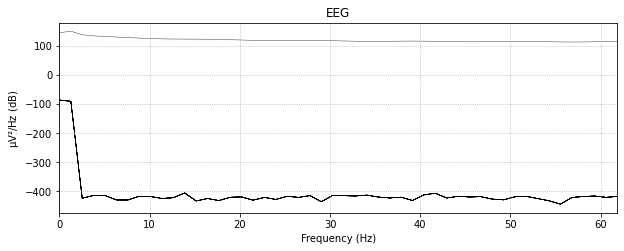

In [8]:
sfreq = board.get_sampling_rate(BoardIds.CYTON_DAISY_BOARD)
ch_data = data[:16,:]
ch_types = ['eeg'] * len(eeg_ch)
ch_names = BoardShim.get_eeg_names(BoardIds.SYNTHETIC_BOARD.value)
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(ch_data, info)
# its time to plot something!
raw.plot_psd(average=False);

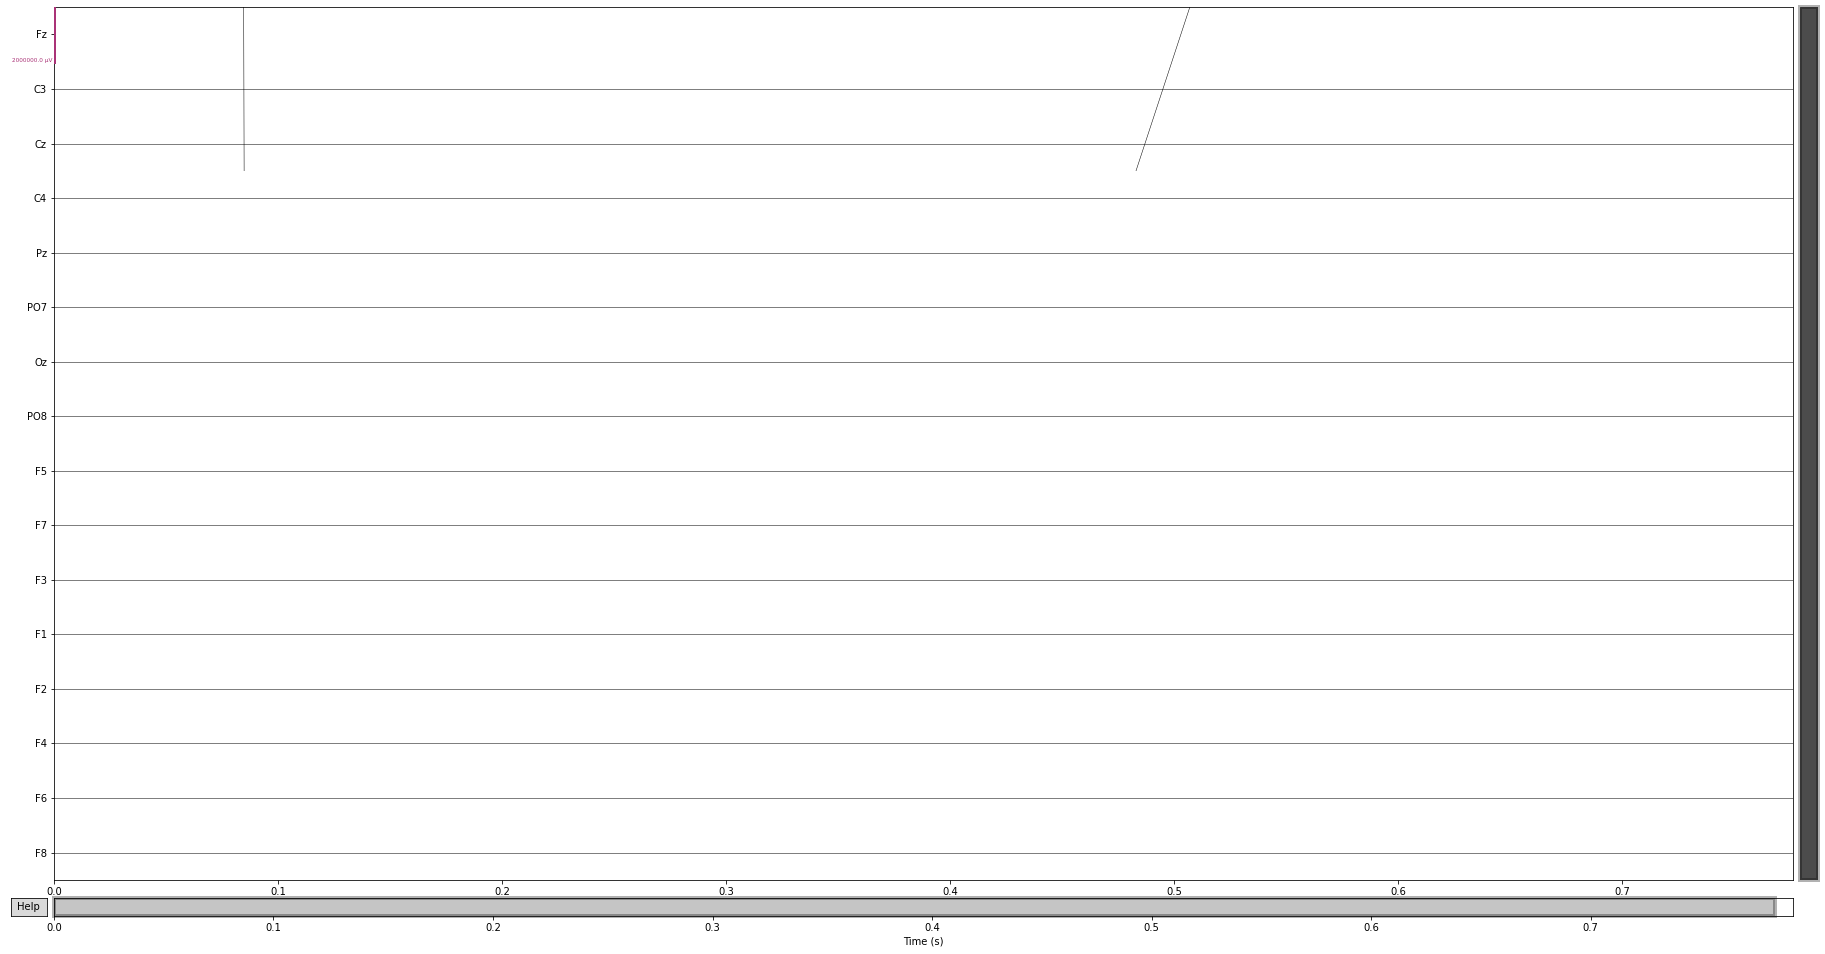

In [9]:
scal = dict(mag=1e-12, grad=4e-11, eeg=1000000e-6)
raw.plot(scalings = scal);

In [11]:
l = [[234,32,1,4,6,123],[234,32,1,4,6,123]]
np.array(l)

array([[234,  32,   1,   4,   6, 123],
       [234,  32,   1,   4,   6, 123]])